# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_data['data']['1']['quotes']['CAD']['price'] * my_btc
my_eth_value = eth_data['data']['1027']['quotes']['CAD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f} CAD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f} CAD")

The current value of your 1.2 BTC is $17953.56 CAD
The current value of your 5.3 ETH is $2567.02 CAD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200 
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-08-14", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
portfolio_ticker = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df


# Preview DataFrame
portfolio_ticker.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-08-14 00:00:00-04:00  118.43  118.49  118.23  118.23  4268992  336.41   

                                                             
                             high     low   close    volume  
2020-08-14 00:00:00-04:00  337.42  335.65  336.86  83898075

In [9]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = portfolio_ticker[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

agg_close_price = df_closing_prices.iloc[0]["AGG"]
spy_close_price = df_closing_prices.iloc[0]["SPY"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.23
Current SPY closing price: $336.86


In [10]:
# Compute the current value of shares
my_spy_value = float(spy_close_price) * my_spy
my_agg_value = float(agg_close_price) * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16843.00
The current value of your 200 AGG shares is $23646.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
shares = my_spy_value + my_agg_value
cryptos = my_btc_value + my_eth_value
portfolio = ["shares", "cryptos"]

df_savings = {
    "amount":[shares, cryptos]
}

df_savings = pd.DataFrame(df_savings, index= portfolio)

# Display savings DataFrame
display(df_savings)

,amount
shares,40489.000000
cryptos,20520.572839


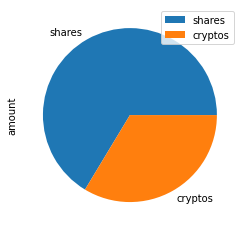

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = shares+cryptos

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in this fund!")
if total_savings == emergency_fund:
    print(f"Congratulations! You have reached your financial goal!")
if total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} away from reaching your financial goal!")

Congratulations! You have enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY", "AGG"]

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_stock_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997444,1.004024,1.001606,0.990808,1.005724,1.005952,0.999879,1.000046,0.989799,0.987753,...,0.991474,0.989702,0.996969,0.992855,0.996246,0.989580,0.993401,1.002546,0.993345,0.984523
2,0.998998,1.001931,0.995021,0.998080,1.019156,0.999607,1.004246,0.994085,1.002091,0.982484,...,0.982050,1.002211,0.993385,1.000666,1.008816,0.995684,0.993621,1.001803,1.006099,0.990045
3,0.985432,1.001482,0.981041,0.990064,1.015510,0.988545,1.018888,0.977482,1.009792,0.988653,...,0.976709,1.012115,0.993343,1.010734,1.014739,0.995640,0.980434,1.008321,1.003900,0.983997
4,0.973433,1.008590,0.984753,0.993950,1.016675,0.991664,1.017079,0.979691,1.012503,0.981544,...,0.969611,1.009777,0.998929,1.030712,1.014034,1.002565,0.973854,0.999562,1.014432,0.992901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.220810,2.883575,7.742647,5.308360,13.784140,11.876291,16.344145,3.384654,42.364370,15.213459,...,0.874450,12.286745,4.942470,4.633196,11.388074,7.997943,10.545365,8.460141,3.140003,9.520634
7557,4.238582,2.891025,7.715297,5.308361,13.940946,11.938496,16.621311,3.338096,42.080594,15.150650,...,0.869062,12.360284,4.962386,4.576925,11.447879,7.981619,10.638125,8.512801,3.142211,9.558510
7558,4.225154,2.907609,7.746601,5.261700,14.047165,11.927146,16.694496,3.378517,41.669320,15.117470,...,0.850357,12.419416,5.000243,4.533091,11.452646,7.922219,10.599489,8.598565,3.109315,9.585726
7559,4.221847,2.889144,7.737583,5.326136,14.171114,11.900108,16.810570,3.375795,41.066109,15.278244,...,0.849904,12.623920,4.928236,4.542252,11.453998,7.890831,10.557008,8.593156,3.135239,9.429799


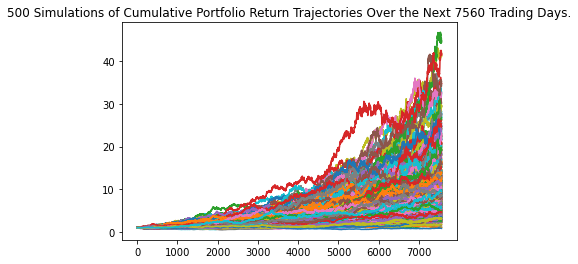

In [19]:
# Plot simulation outcomes
line_plot = MC_stock_dist.plot_simulation()

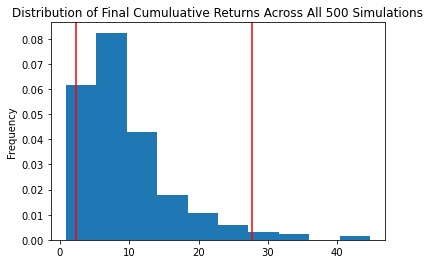

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_stock_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl) 

count           500.000000
mean              9.656677
std               6.783654
min               0.849227
25%               4.997137
50%               7.759993
75%              12.139652
max              44.729565
95% CI Lower      2.374846
95% CI Upper     27.662555
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*initial_investment, 2)
ci_upper = round(even_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $47496.92 and $553251.11


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment, 2)
ci_upper = round(even_tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $71245.38 and $829876.66


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_stock_high_five_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.3,.7],
    num_simulation = 1000,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_high_five_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994875,1.005554,1.001990,0.997655,0.996914,0.988830,0.991966,1.007047,1.002841,0.998141,...,1.006504,1.008812,0.991417,0.983612,0.997533,1.001995,1.002349,0.997982,1.009913,0.993693
2,1.003399,0.993325,1.004889,0.993915,0.997005,0.982787,0.983851,1.009134,1.004925,0.995959,...,1.002867,1.012060,1.008547,0.969532,0.999067,1.010692,1.003549,0.981953,1.008405,0.994236
3,1.009123,1.008455,1.003625,0.998441,0.992802,0.972917,0.977819,1.032160,1.002963,1.007372,...,1.017392,1.010603,1.009259,0.973939,1.007768,1.015834,1.001572,0.964827,1.002533,0.994325
4,1.005445,1.000670,1.002179,0.994253,1.002144,0.984043,0.974685,1.043994,0.995777,0.998403,...,1.017503,1.007322,1.024528,0.965931,1.004334,1.004538,1.010770,0.958306,0.995874,0.983450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.489203,2.153575,1.370842,2.440401,1.317188,1.961572,1.192482,1.974469,1.401191,1.425054,...,1.145293,1.514503,1.967120,1.846125,1.102033,1.813814,1.705882,1.190939,1.464142,2.451834
1257,2.511698,2.135315,1.379097,2.425735,1.311059,1.958805,1.195761,1.967689,1.386392,1.431986,...,1.146299,1.513116,1.966568,1.845769,1.102613,1.833640,1.702897,1.178448,1.465637,2.448006
1258,2.513626,2.139387,1.360949,2.423962,1.310453,1.967144,1.187615,1.976548,1.401844,1.428510,...,1.152216,1.500674,1.978604,1.854010,1.118950,1.824253,1.720930,1.154536,1.446442,2.438589
1259,2.537300,2.129948,1.372883,2.419966,1.312549,1.976526,1.190065,1.984236,1.400261,1.419010,...,1.147832,1.496372,1.996234,1.860701,1.125160,1.832934,1.735652,1.155304,1.448114,2.459996


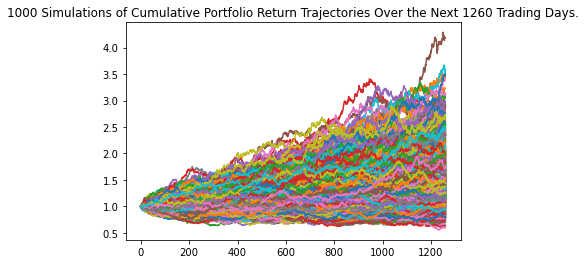

In [26]:
# Plot simulation outcomes
plot_line_five = MC_stock_high_five_dist.plot_simulation()

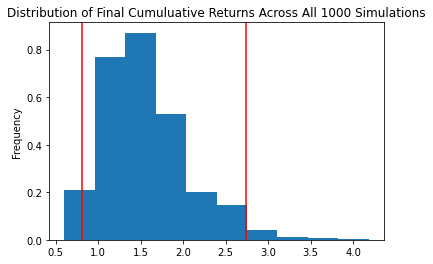

In [27]:
# Plot probability distribution and confidence intervals
plot_dist_five = MC_stock_high_five_dist.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_stock_high_five_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five) 

count           1000.000000
mean               1.558941
std                0.498223
min                0.599742
25%                1.197255
50%                1.491699
75%                1.811409
max                4.182814
95% CI Lower       0.808111
95% CI Upper       2.734833
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(even_tbl_five[8]*initial_investment, 2)
ci_upper_five = round(even_tbl_five[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $16162.22 and $54696.66


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_bal_ten_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_bal_ten_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.986674,1.012950,0.991657,1.004585,1.001014,1.002386,1.006530,1.001551,1.001705,1.005641,...,1.010041,0.997020,0.995977,0.999968,0.994071,1.000559,0.998729,1.006229,0.990608,0.990607
2,0.988251,1.011840,0.995530,1.005095,1.007082,0.997576,1.002974,0.995547,1.005772,1.010815,...,1.018772,0.988198,0.999565,1.005352,0.997162,0.985190,1.000270,1.001407,0.989561,1.003976
3,0.978860,1.005910,1.000234,1.000019,1.005357,0.987432,1.000831,1.001207,1.003390,1.010477,...,1.022818,0.985208,1.005838,1.019789,1.005149,0.992514,1.001602,1.008410,0.989141,1.006530
4,0.986589,1.006380,1.012413,0.993894,1.001986,0.995828,0.996179,1.008021,0.997426,1.009495,...,1.005693,0.980638,1.008563,1.014992,1.002376,0.997808,1.004189,0.993541,0.993544,1.008183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.876890,1.176239,1.563950,1.319779,2.263506,1.575167,2.058033,1.885532,3.247537,1.483877,...,2.712644,1.773273,0.685284,2.470476,1.352089,2.133861,2.261402,2.682712,2.011297,1.272623
2517,4.890418,1.164256,1.586317,1.316406,2.247779,1.552519,2.062754,1.865122,3.260145,1.470785,...,2.706469,1.769777,0.687763,2.472119,1.363334,2.112575,2.271208,2.704469,2.009180,1.287394
2518,4.884121,1.164131,1.597961,1.312109,2.257023,1.539326,2.047113,1.852302,3.320745,1.462806,...,2.712906,1.775825,0.679639,2.481793,1.369004,2.135646,2.239941,2.693206,2.035547,1.290277
2519,4.866863,1.165050,1.600933,1.311579,2.280329,1.530100,2.047730,1.903236,3.292565,1.454496,...,2.731090,1.772784,0.674019,2.509412,1.377732,2.127651,2.244027,2.699761,2.022314,1.301687


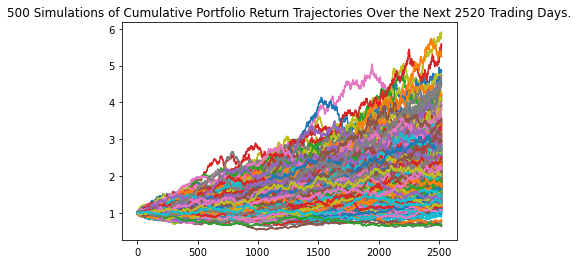

In [32]:
# Plot simulation outcomes
MC_stock_bal_ten_dist.plot_simulation()

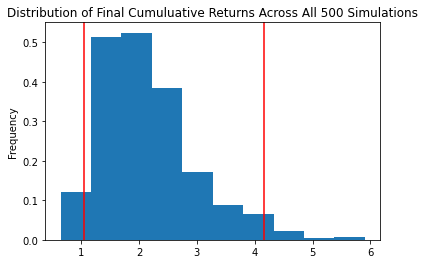

In [33]:
# Plot probability distribution and confidence intervals
MC_stock_bal_ten_dist.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_stock_bal_ten_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten) 

count           500.000000
mean              2.139984
std               0.821295
min               0.640529
25%               1.562609
50%               1.951002
75%               2.545720
max               5.905951
95% CI Lower      1.042919
95% CI Upper      4.168261
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(even_tbl_ten[8]*initial_investment, 2)
ci_upper_ten = round(even_tbl_ten[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $20858.39 and $83365.23
